소프트맥스 함수

분류에 사용


In [4]:
import numpy as np

def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a-c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

a = np.array([0.3,2.9,4.0])
y = softmax(a)
print(y)
np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0

# **CHAPTER 04 신경망의 학습**

4.1 손글씨 인식

In [14]:
from tensorflow.keras.datasets import mnist
import numpy as np
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


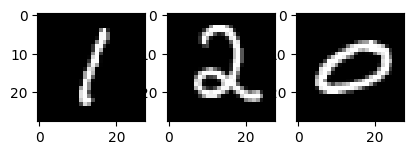

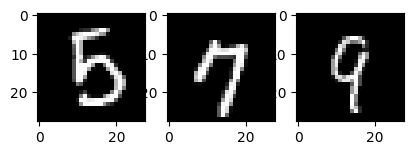

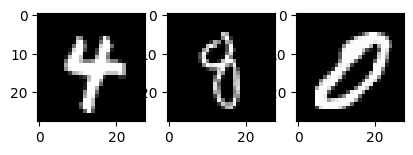

In [15]:
import matplotlib.pyplot as plt
import random
for i in range(1,4,1):
    for j in range(1,4,1):
        plt.subplot(i,4,j)
        plt.imshow(x_train[random.randint(0,60000)],cmap="gray")
    plt.show()


In [16]:
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape(-1,28,28,1)/255.
x_test = x_test.reshape(-1,28,28,1)/255.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [17]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization,Conv2D

In [18]:
model = Sequential()
model.add(Conv2D(32,(2,2),activation="relu",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(64,(2,2),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128,(2,2),2,activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(32,(2,2),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(64,(2,2),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128,(2,2),2,activation="relu"))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [ ]:
model.compile(loss = "categorical_crossentropy",optimizer = "adam",metrics=["acc"])
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,batch_size=256)

In [ ]:
loss = history.history["loss"]
acc = history.history["acc"]
val_loss = history.history["val_loss"]
val_acc = history.history["val_acc"]
plt.subplot(1,2,1)
plt.plot(range(len(loss)),loss,label = "Train Loss")
plt.plot(range(len(val_loss)),val_loss,label = "Validation Loss")
plt.grid()
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(len(acc)),acc,label = "Train Accuracy")
plt.plot(range(len(val_acc)),val_acc,label = "Validation Accuracy")
plt.grid()
plt.legend()
plt.show()

In [ ]:
index =random.randint(0,9999)
plt.imshow(x_test[index],cmap="gray")
predict = model.predict(x_test[index].reshape(1,28,28,1))
print("Actual : {}\tPredict : {}".format(np.argmax(y_test[index]),np.argmax(predict)),)

In [ ]:
wrong_index_list=[]
predict = model.predict(x_test)
for index in range(10000):
    if np.argmax(y_test[index]) != np.argmax(predict[index]):
        wrong_index_list.append(index)
print(wrong_index_list)
print("총 틀린 갯수 : ",len(wrong_index_list))

**4.2 손실 함수**

오차제곱합
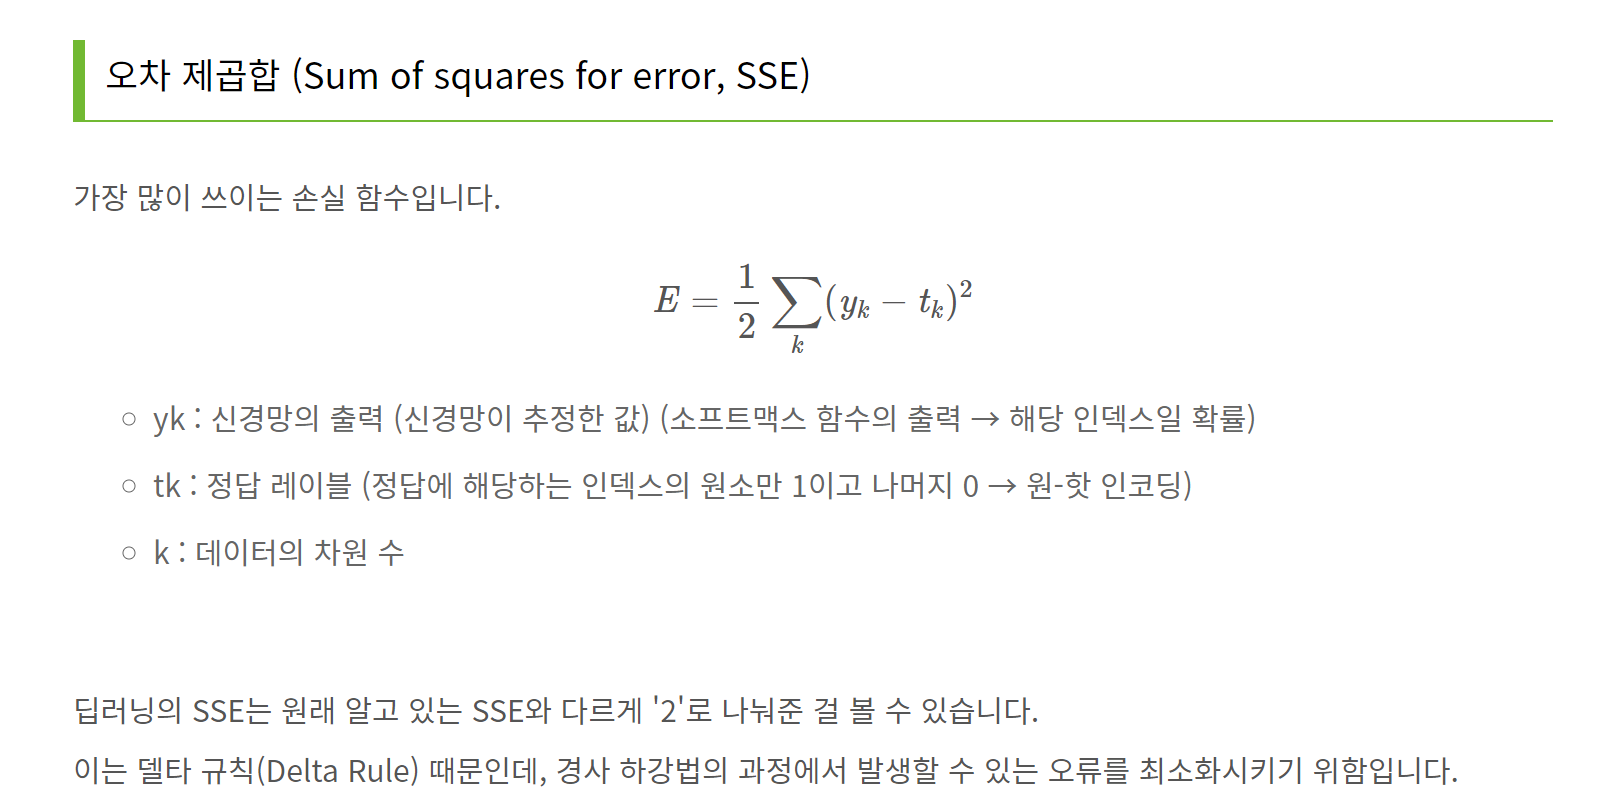

In [6]:
import numpy as np

def sum_squares_error(y, t):
  return 0.5 * np.sum((y-t)**2)

t = [0,0,1,0,0,0,0,0,0,0]

y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]

sum_squares_error(np.array(y), np.array(t))

0.5975

교차 엔트로피 오차

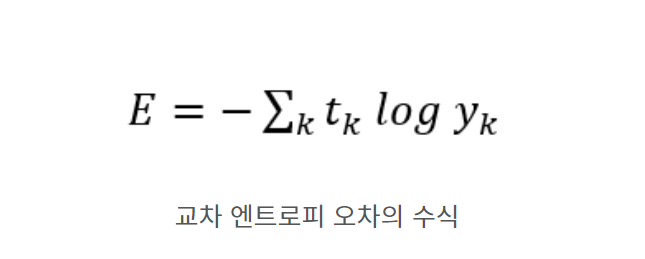

In [8]:
def cross_entropy_error(y,t):
  delta = 1e-7
  return -np.sum((t * np.log(y + delta)))

t = [0,0,1,0,0,0,0,0,0,0]

y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]

print(cross_entropy_error(np.array(y), np.array(t)))

y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]

print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


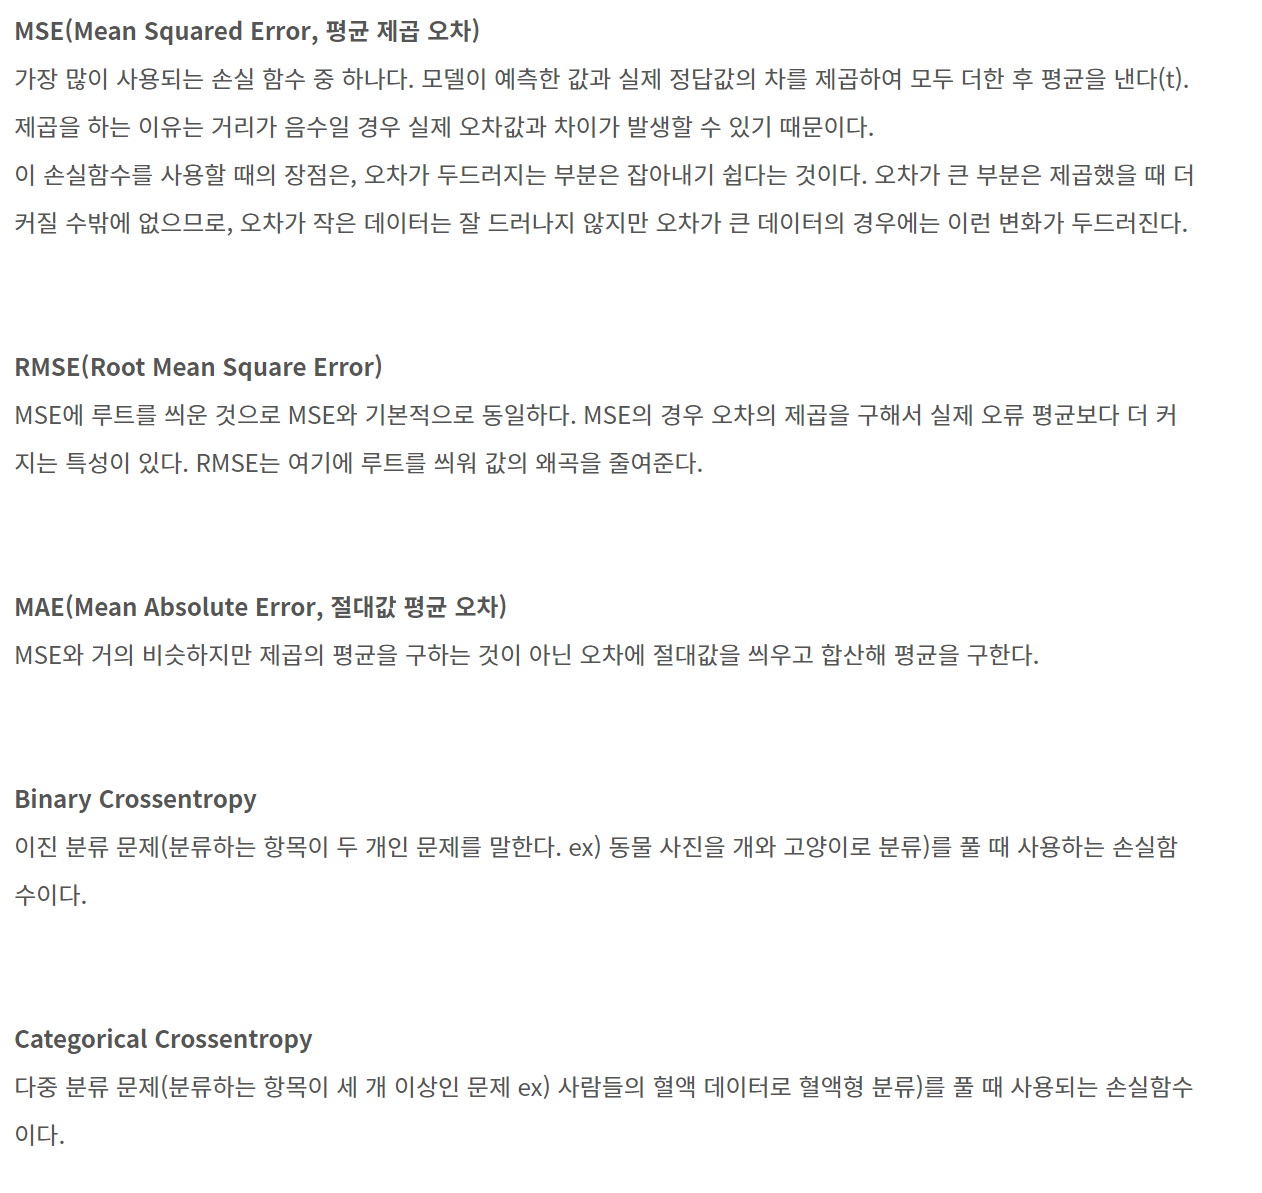

미니배치 학습

훈련 데이터로부터 일부만 골라 학습 진행

# **4.3 수치 미분**

In [26]:
def numerical_diff(f, x):
  h = 1e-4
  return (f(x+h)-f(x-h))/ (2*h)

수치미분의 예

y = 0.01 * x* x + 0.1 * x

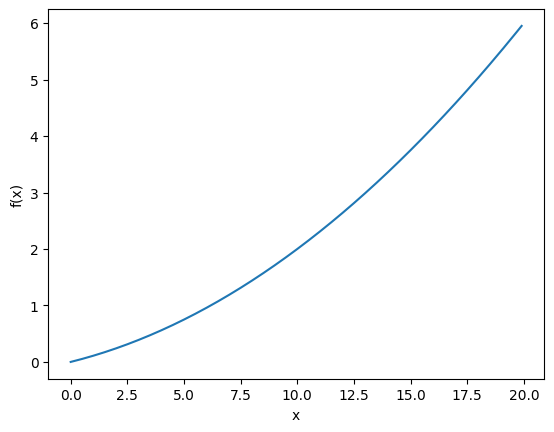

In [27]:
import numpy as np
import matplotlib.pylab as plt

def function_1(x):
  return 0.01 * x** 2 + 0.1 * x

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [28]:
print(numerical_diff(function_1 , 5.0))
print(numerical_diff(function_1 , 10.0))


0.1999999999990898
0.2999999999986347


**편미분**
 다변수함수에서 특정한 변수가 이 함수에 미치는 영향이 궁금할 때 이를 효과적으로 알아낼 수 있기 때문

In [29]:
def function_2(x):
  return x[0]**2 + x[1]**2


In [41]:
def function_tmp1(x0):
  return x0*x0 + 4.0 ** 2.0

def function_tmp2(x1):
  return 3.0**2.0 + x1*x1

print(numerical_diff(function_tmp1, 3.0))
print(numerical_diff(function_tmp2, 4.0))


6.00000000000378
7.999999999999119


기울기
